In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42

загрузим учебные датасеты в DataFrame

In [53]:
data1 = pd.DataFrame(pd.read_csv("data\\S07-hw-dataset-01.csv"))
print(data1.head())
print(data1.info())
data1.describe()

sample_id_data1 = data1['sample_id']
X1 = data1.drop(columns="sample_id")

   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04 

In [54]:
data2 = pd.DataFrame(pd.read_csv("data\\S07-hw-dataset-02.csv"))
print(data2.head())
print(data2.info())
data2.describe()

sample_id_data2 = data2['sample_id']
X2 = data2.drop(columns="sample_id")

   sample_id        x1        x2    z_noise
0          0  0.098849 -1.846034  21.288122
1          1 -1.024516  1.829616   6.072952
2          2 -1.094178 -0.158545 -18.938342
3          3 -1.612808 -1.565844 -11.629462
4          4  1.659901 -2.133292   1.895472
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None


In [55]:
data3 = pd.DataFrame(pd.read_csv("data\\S07-hw-dataset-03.csv"))
print(data3.head()) 
print(data3.info())
data3.describe()

sample_id_data3 = data3['sample_id']
X3 = data3.drop(columns="sample_id")

   sample_id        x1        x2    f_corr   f_noise
0          0 -2.710470  4.997107 -1.015703  0.718508
1          1  8.730238 -8.787416  3.953063 -1.105349
2          2 -1.079600 -2.558708  0.976628 -3.605776
3          3  6.854042  1.560181  1.760614 -1.230946
4          4  9.963812 -8.869921  2.966583  0.915899
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
None


 Препроцессинг датасета 1

In [56]:
def preprocess_dataset(X, strategy='mean'):
    imputer = SimpleImputer(strategy=strategy)
    X_imputed = imputer.fit_transform(X)
    
    scaler = StandardScaler()
    X_processed = scaler.fit_transform(X_imputed)
    
    return X_processed, imputer, scaler


print("Пропуски до обработки:")
print(X1.isnull().sum())
X1_processed, imputer1, scaler1 = preprocess_dataset(X1)
print(f"\nФорма данных после препроцессинга: {X1_processed.shape}")
print(f"Среднее значение: {X1_processed.mean(axis=0)}")
print(f"Стандартное отклонение: {X1_processed.std(axis=0)}")


Пропуски до обработки:
f01    0
f02    0
f03    0
f04    0
f05    0
f06    0
f07    0
f08    0
dtype: int64

Форма данных после препроцессинга: (12000, 8)
Среднее значение: [-7.10542736e-18 -4.05601478e-17 -7.10542736e-18 -1.65793305e-17
 -2.72374715e-17 -3.55271368e-17 -2.25005200e-17 -5.92118946e-18]
Стандартное отклонение: [1. 1. 1. 1. 1. 1. 1. 1.]


Препроцессинг датасета 2

In [57]:
print("Пропуски до обработки:")
print(X2.isnull().sum())
X2_processed, imputer2, scaler2 = preprocess_dataset(X2)
print(f"\nФорма данных после препроцессинга: {X2_processed.shape}")
print(f"Среднее значение: {X2_processed.mean(axis=0)}")
print(f"Стандартное отклонение: {X2_processed.std(axis=0)}")


Пропуски до обработки:
x1         0
x2         0
z_noise    0
dtype: int64

Форма данных после препроцессинга: (8000, 3)
Среднее значение: [-5.32907052e-18  5.15143483e-17 -8.43769499e-18]
Стандартное отклонение: [1. 1. 1.]


 Препроцессинг датасета 3

In [58]:

print("Пропуски до обработки:")
print(X3.isnull().sum())
X3_processed, imputer3, scaler3 = preprocess_dataset(X3)
print(f"\nФорма данных после препроцессинга: {X3_processed.shape}")
print(f"Среднее значение: {X3_processed.mean(axis=0)}")
print(f"Стандартное отклонение: {X3_processed.std(axis=0)}")


Пропуски до обработки:
x1         0
x2         0
f_corr     0
f_noise    0
dtype: int64

Форма данных после препроцессинга: (15000, 4)
Среднее значение: [ 0.00000000e+00 -3.03164901e-17  0.00000000e+00 -1.13686838e-17]
Стандартное отклонение: [1. 1. 1. 1.]


## Сравнение алгоритмов кластеризации

Датасет 1 KMeans и DBSCAN

=== KMEANS ===
k=2: Silhouette Score = 0.5216, Inertia = 48425.9070
k=3: Silhouette Score = 0.3968, Inertia = 35016.7932
k=4: Silhouette Score = 0.3833, Inertia = 28591.3334
k=5: Silhouette Score = 0.3548, Inertia = 25476.2863
k=6: Silhouette Score = 0.3586, Inertia = 23662.1936
k=7: Silhouette Score = 0.3246, Inertia = 21751.6149
k=8: Silhouette Score = 0.2689, Inertia = 20120.3839
k=9: Silhouette Score = 0.2534, Inertia = 18557.0185
k=10: Silhouette Score = 0.2629, Inertia = 17243.9658
k=11: Silhouette Score = 0.2659, Inertia = 16217.2505
k=12: Silhouette Score = 0.2686, Inertia = 15218.5670
k=13: Silhouette Score = 0.2744, Inertia = 14279.5574
k=14: Silhouette Score = 0.2787, Inertia = 13277.0856
k=15: Silhouette Score = 0.2884, Inertia = 12478.8696
k=16: Silhouette Score = 0.2854, Inertia = 12022.2922
k=17: Silhouette Score = 0.2801, Inertia = 11513.8156
k=18: Silhouette Score = 0.2745, Inertia = 11047.3655
k=19: Silhouette Score = 0.2720, Inertia = 10610.6646
k=20: Silhouette Scor

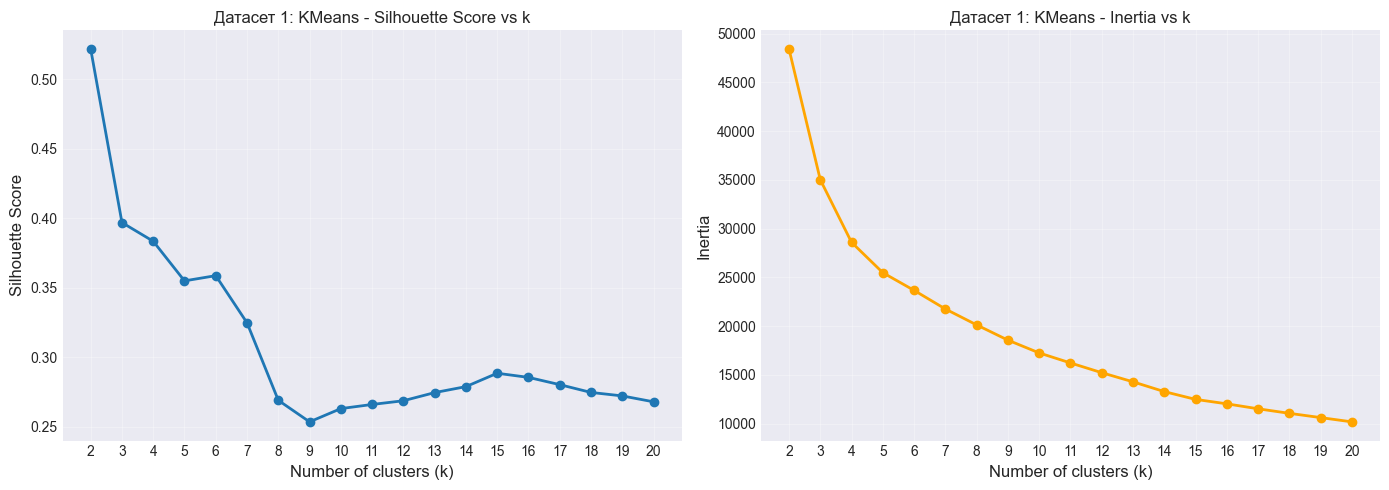


Оптимальное k по Silhouette Score: 2


In [59]:
print("=== KMEANS ===")
k_range = range(2, 21)
silhouette_scores_1 = []
inertia_1 = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans.fit_predict(X1_processed)
    silhouette_avg = silhouette_score(X1_processed, cluster_labels)
    silhouette_scores_1.append(silhouette_avg)
    inertia_1.append(kmeans.inertia_)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}, Inertia = {kmeans.inertia_:.4f}")

# График Silhouette Score vs k
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_range, silhouette_scores_1, marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of clusters (k)', fontsize=12)
ax1.set_ylabel('Silhouette Score', fontsize=12)
ax1.set_title('Датасет 1: KMeans - Silhouette Score vs k', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

ax2.plot(k_range, inertia_1, marker='o', linestyle='-', linewidth=2, markersize=6, color='orange')
ax2.set_xlabel('Number of clusters (k)', fontsize=12)
ax2.set_ylabel('Inertia', fontsize=12)
ax2.set_title('Датасет 1: KMeans - Inertia vs k', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range)

plt.tight_layout()
plt.show()

# Выбор оптимального k (по максимальному Silhouette Score)
optimal_k_1 = list(k_range)[np.argmax(silhouette_scores_1)]
print(f"\nОптимальное k по Silhouette Score: {optimal_k_1}")


In [60]:
print("\n=== DBSCAN ===")
eps_range = np.arange(0.3, 2.0, 0.2)
min_samples_range = [3, 5, 10]

best_silhouette_1 = -1
best_params_1 = {}

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X1_processed)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)
        
        if n_clusters > 1 and n_clusters < len(X1_processed):
            try:
                silhouette_avg = silhouette_score(X1_processed, cluster_labels)
                print(f"eps={eps:.2f}, min_samples={min_samples}: Clusters={n_clusters}, Noise={n_noise}, Silhouette={silhouette_avg:.4f}")
                if silhouette_avg > best_silhouette_1:
                    best_silhouette_1 = silhouette_avg
                    best_params_1 = {'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters}
            except:
                pass

if best_params_1:
    print(f"\nОптимальные параметры DBSCAN: eps={best_params_1['eps']:.2f}, min_samples={best_params_1['min_samples']}, Silhouette={best_silhouette_1:.4f}")
else:
    print("Не удалось найти хорошие параметры для DBSCAN с положительным Silhouette Score")



=== DBSCAN ===
eps=0.30, min_samples=3: Clusters=200, Noise=3810, Silhouette=-0.4027
eps=0.30, min_samples=5: Clusters=81, Noise=5202, Silhouette=-0.4156
eps=0.30, min_samples=10: Clusters=28, Noise=7466, Silhouette=-0.3890
eps=0.50, min_samples=3: Clusters=10, Noise=303, Silhouette=0.2537
eps=0.50, min_samples=5: Clusters=9, Noise=404, Silhouette=0.2567
eps=0.50, min_samples=10: Clusters=6, Noise=747, Silhouette=0.3082
eps=0.70, min_samples=3: Clusters=5, Noise=36, Silhouette=0.3762
eps=0.70, min_samples=5: Clusters=5, Noise=46, Silhouette=0.3766
eps=0.70, min_samples=10: Clusters=5, Noise=80, Silhouette=0.3754
eps=0.90, min_samples=3: Clusters=5, Noise=12, Silhouette=0.3779
eps=0.90, min_samples=5: Clusters=5, Noise=12, Silhouette=0.3779
eps=0.90, min_samples=10: Clusters=5, Noise=12, Silhouette=0.3779
eps=1.10, min_samples=3: Clusters=4, Noise=3, Silhouette=0.3832
eps=1.10, min_samples=5: Clusters=4, Noise=4, Silhouette=0.3832
eps=1.10, min_samples=10: Clusters=4, Noise=5, Silhouet

 Метрики качества и визуализация для датасета 1

In [ ]:

print("=== Метрики качества Датасет 1 ===\n")
print("KMEANS:")
kmeans_1_best = KMeans(n_clusters=optimal_k_1, random_state=RANDOM_STATE, n_init=10)
labels_kmeans_1 = kmeans_1_best.fit_predict(X1_processed)

sil_kmeans_1 = silhouette_score(X1_processed, labels_kmeans_1)
db_kmeans_1 = davies_bouldin_score(X1_processed, labels_kmeans_1)
ch_kmeans_1 = calinski_harabasz_score(X1_processed, labels_kmeans_1)

print(f"  k={optimal_k_1}")
print(f"  Silhouette Score: {sil_kmeans_1:.4f}")
print(f"  Davies-Bouldin Score: {db_kmeans_1:.4f}")
print(f"  Calinski-Harabasz Score: {ch_kmeans_1:.4f}")

print("\nDBSCAN:")
if best_params_1:
    dbscan_1_best = DBSCAN(eps=best_params_1['eps'], min_samples=best_params_1['min_samples'])
    labels_dbscan_1 = dbscan_1_best.fit_predict(X1_processed)
    
    n_clusters_dbscan_1 = len(set(labels_dbscan_1)) - (1 if -1 in labels_dbscan_1 else 0)
    n_noise_dbscan_1 = list(labels_dbscan_1).count(-1)
    noise_fraction_1 = n_noise_dbscan_1 / len(labels_dbscan_1)
    
    print(f"  eps={best_params_1['eps']:.2f}, min_samples={best_params_1['min_samples']}")
    print(f"  Кластеры: {n_clusters_dbscan_1}, Шум: {n_noise_dbscan_1} ({noise_fraction_1*100:.2f}%)")
    
    non_noise_mask_1 = labels_dbscan_1 != -1
    if non_noise_mask_1.sum() > 1:
        X_non_noise_1 = X1_processed[non_noise_mask_1]
        labels_non_noise_1 = labels_dbscan_1[non_noise_mask_1]
        
        sil_dbscan_1 = silhouette_score(X_non_noise_1, labels_non_noise_1)
        db_dbscan_1 = davies_bouldin_score(X_non_noise_1, labels_non_noise_1)
        ch_dbscan_1 = calinski_harabasz_score(X_non_noise_1, labels_non_noise_1)
        
        print(f"  Метрики (только non-noise точки, n={X_non_noise_1.shape[0]}):")
        print(f"    Silhouette Score: {sil_dbscan_1:.4f}")
        print(f"    Davies-Bouldin Score: {db_dbscan_1:.4f}")
        print(f"    Calinski-Harabasz Score: {ch_dbscan_1:.4f}")
else:
    print("  Не найдены хорошие параметры")
    labels_dbscan_1 = None


print("\n=== Выбор лучшего метода для Датасета 1 ===")
if best_params_1 and sil_dbscan_1 > sil_kmeans_1:
    best_method_1 = "DBSCAN"
    best_labels_1 = labels_dbscan_1
    best_params_final_1 = best_params_1
    print(f" Выбран: DBSCAN (Silhouette: {sil_dbscan_1:.4f} > KMeans: {sil_kmeans_1:.4f})")
else:
    best_method_1 = "KMeans"
    best_labels_1 = labels_kmeans_1
    best_params_final_1 = {'k': optimal_k_1}
    print(f" Выбран: KMeans (Silhouette: {sil_kmeans_1:.4f} >= DBSCAN: {sil_dbscan_1 if best_params_1 else 'N/A'})")


=== Метрики качества Датасет 1 ===

KMEANS:
  k=2
  Silhouette Score: 0.5216
  Davies-Bouldin Score: 0.6853
  Calinski-Harabasz Score: 11786.9546

DBSCAN:
  eps=1.70, min_samples=3
  Кластеры: 2, Шум: 0 (0.00%)
  Метрики (только non-noise точки, n=12000):
    Silhouette Score: 0.5216
    Davies-Bouldin Score: 0.6853
    Calinski-Harabasz Score: 11786.9546

=== Выбор лучшего метода для Датасета 1 ===
 Выбран: KMeans (Silhouette: 0.5216 >= DBSCAN: 0.5216395622404242)


In [ ]:

from pathlib import Path
import json


artifacts_dir = Path("artifacts")
labels_dir = artifacts_dir / "labels"
figures_dir = artifacts_dir / "figures"
labels_dir.mkdir(parents=True, exist_ok=True)
figures_dir.mkdir(parents=True, exist_ok=True)


pca_1 = PCA(n_components=2, random_state=RANDOM_STATE)
X1_pca = pca_1.fit_transform(X1_processed)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X1_pca[:, 0], X1_pca[:, 1], c=labels_kmeans_1, cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca_1.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca_1.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title(f'Датасет 1: KMeans (k={optimal_k_1})')
axes[0].grid(True, alpha=0.3)

if labels_dbscan_1 is not None:
    scatter = axes[1].scatter(X1_pca[:, 0], X1_pca[:, 1], c=labels_dbscan_1, cmap='plasma', alpha=0.6, s=50)
    axes[1].set_xlabel(f'PC1 ({pca_1.explained_variance_ratio_[0]*100:.1f}%)')
    axes[1].set_ylabel(f'PC2 ({pca_1.explained_variance_ratio_[1]*100:.1f}%)')
    axes[1].set_title(f'Датасет 1: DBSCAN (eps={best_params_1["eps"]:.2f}, ms={best_params_1["min_samples"]})')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1], label='Cluster (-1 = noise)')

plt.tight_layout()
plt.savefig(figures_dir / "01_pca_scatter_ds1.png", dpi=300, bbox_inches='tight')
plt.close()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, silhouette_scores_1, marker='o', linestyle='-', linewidth=2, markersize=8, label='Silhouette Score')
ax.axvline(optimal_k_1, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k_1}')
ax.set_xlabel('Number of clusters (k)', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Датасет 1: KMeans - Silhouette Score vs k', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xticks(k_range)
plt.tight_layout()
plt.savefig(figures_dir / "02_kmeans_silhouette_vs_k_ds1.png", dpi=300, bbox_inches='tight')
plt.close()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

methods = [best_method_1, "DBSCAN" if best_params_1 else "N/A"]
sil_scores = [sil_kmeans_1, sil_dbscan_1 if best_params_1 else 0]
db_scores = [db_kmeans_1, db_dbscan_1 if best_params_1 else 0]
ch_scores = [ch_kmeans_1, ch_dbscan_1 if best_params_1 else 0]

colors = ['steelblue', 'lightcoral']
x_pos = [0, 1]

axes[0].bar(x_pos[:len(methods)], sil_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Датасет 1: Silhouette Score\n(больше = лучше)', fontsize=11)
axes[0].set_xticks(x_pos[:len(methods)])
axes[0].set_xticklabels(methods)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x_pos[:len(methods)], db_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[1].set_ylabel('Score', fontsize=11)
axes[1].set_title('Датасет 1: Davies-Bouldin Score\n(меньше = лучше)', fontsize=11)
axes[1].set_xticks(x_pos[:len(methods)])
axes[1].set_xticklabels(methods)
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(x_pos[:len(methods)], ch_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[2].set_ylabel('Score', fontsize=11)
axes[2].set_title('Датасет 1: Calinski-Harabasz Score\n(больше = лучше)', fontsize=11)
axes[2].set_xticks(x_pos[:len(methods)])
axes[2].set_xticklabels(methods)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(figures_dir / "03_metrics_comparison_ds1.png", dpi=300, bbox_inches='tight')
plt.close()



✓ Сохранён: 01_pca_scatter_ds1.png
✓ Сохранён: 02_kmeans_silhouette_vs_k_ds1.png
✓ Сохранён: 03_metrics_comparison_ds1.png


 Датасет 2 KMeans и DBSCAN


=== Датасет 2: KMEANS ===
k=2: Silhouette Score = 0.3069, Inertia = 16588.5010
k=3: Silhouette Score = 0.2700, Inertia = 13552.9407
k=4: Silhouette Score = 0.2515, Inertia = 11461.9799
k=5: Silhouette Score = 0.2521, Inertia = 10201.4976
k=6: Silhouette Score = 0.2598, Inertia = 9201.9915
k=7: Silhouette Score = 0.2536, Inertia = 8445.5561
k=8: Silhouette Score = 0.2523, Inertia = 7718.1756
k=9: Silhouette Score = 0.2525, Inertia = 7095.1125
k=10: Silhouette Score = 0.2609, Inertia = 6464.4891
k=11: Silhouette Score = 0.2659, Inertia = 6067.5285
k=12: Silhouette Score = 0.2636, Inertia = 5743.0876
k=13: Silhouette Score = 0.2654, Inertia = 5425.6210
k=14: Silhouette Score = 0.2719, Inertia = 5049.8018
k=15: Silhouette Score = 0.2760, Inertia = 4768.5472
k=16: Silhouette Score = 0.2839, Inertia = 4463.9302
k=17: Silhouette Score = 0.2827, Inertia = 4262.2227
k=18: Silhouette Score = 0.2793, Inertia = 4105.3051
k=19: Silhouette Score = 0.2789, Inertia = 3924.9192
k=20: Silhouette Score 

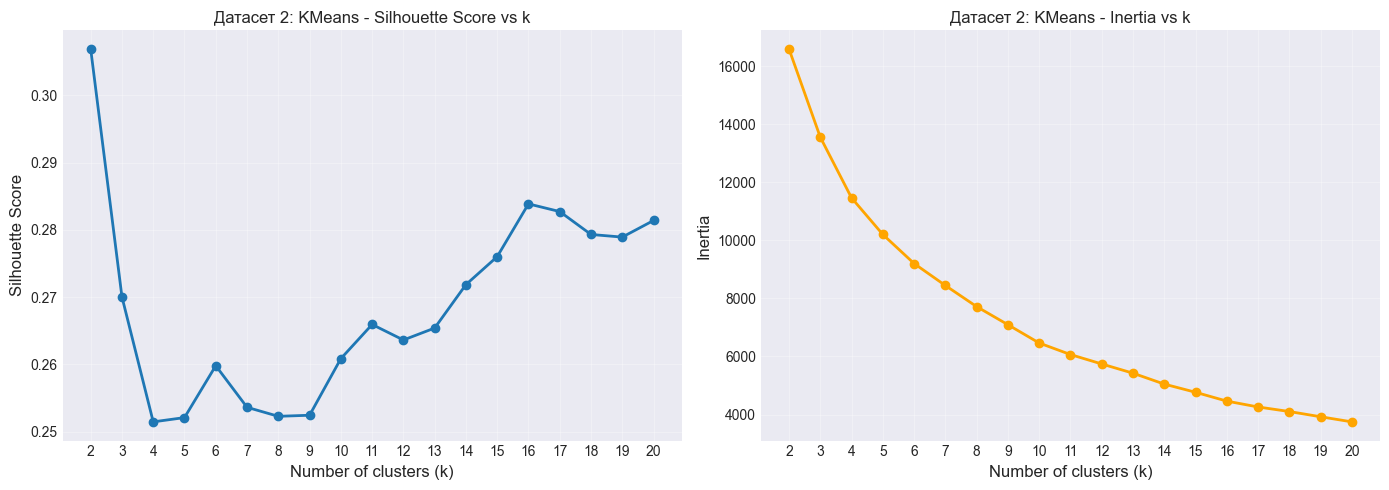


Оптимальное k по Silhouette Score: 2


In [63]:
print("\n=== Датасет 2: KMEANS ===")
silhouette_scores_2 = []
inertia_2 = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans.fit_predict(X2_processed)
    silhouette_avg = silhouette_score(X2_processed, cluster_labels)
    silhouette_scores_2.append(silhouette_avg)
    inertia_2.append(kmeans.inertia_)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}, Inertia = {kmeans.inertia_:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_range, silhouette_scores_2, marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of clusters (k)', fontsize=12)
ax1.set_ylabel('Silhouette Score', fontsize=12)
ax1.set_title('Датасет 2: KMeans - Silhouette Score vs k', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

ax2.plot(k_range, inertia_2, marker='o', linestyle='-', linewidth=2, markersize=6, color='orange')
ax2.set_xlabel('Number of clusters (k)', fontsize=12)
ax2.set_ylabel('Inertia', fontsize=12)
ax2.set_title('Датасет 2: KMeans - Inertia vs k', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range)

plt.tight_layout()
plt.show()

optimal_k_2 = list(k_range)[np.argmax(silhouette_scores_2)]
print(f"\nОптимальное k по Silhouette Score: {optimal_k_2}")


In [64]:
print("\n=== Датасет 2: DBSCAN ===")
best_silhouette_2 = -1
best_params_2 = {}

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X2_processed)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)
        
        if n_clusters > 1 and n_clusters < len(X2_processed):
            try:
                silhouette_avg = silhouette_score(X2_processed, cluster_labels)
                print(f"eps={eps:.2f}, min_samples={min_samples}: Clusters={n_clusters}, Noise={n_noise}, Silhouette={silhouette_avg:.4f}")
                if silhouette_avg > best_silhouette_2:
                    best_silhouette_2 = silhouette_avg
                    best_params_2 = {'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters}
            except:
                pass

if best_params_2:
    print(f"\nОптимальные параметры DBSCAN: eps={best_params_2['eps']:.2f}, min_samples={best_params_2['min_samples']}, Silhouette={best_silhouette_2:.4f}")
else:
    print("Не удалось найти хорошие параметры для DBSCAN с положительным Silhouette Score")



=== Датасет 2: DBSCAN ===
eps=0.30, min_samples=3: Clusters=30, Noise=474, Silhouette=-0.3264
eps=0.30, min_samples=5: Clusters=5, Noise=579, Silhouette=0.0524
eps=0.50, min_samples=3: Clusters=32, Noise=204, Silhouette=-0.0789
eps=0.50, min_samples=5: Clusters=14, Noise=360, Silhouette=-0.0852
eps=0.50, min_samples=10: Clusters=2, Noise=509, Silhouette=0.2151
eps=0.70, min_samples=3: Clusters=2, Noise=57, Silhouette=0.3314
eps=0.70, min_samples=10: Clusters=5, Noise=291, Silhouette=0.2751

Оптимальные параметры DBSCAN: eps=0.70, min_samples=3, Silhouette=0.3314


Метрики качества и визуализация для датасета 2

In [ ]:

print("\n=== Метрики качества Датасет 2 ===\n")
print("KMEANS:")
kmeans_2_best = KMeans(n_clusters=optimal_k_2, random_state=RANDOM_STATE, n_init=10)
labels_kmeans_2 = kmeans_2_best.fit_predict(X2_processed)

sil_kmeans_2 = silhouette_score(X2_processed, labels_kmeans_2)
db_kmeans_2 = davies_bouldin_score(X2_processed, labels_kmeans_2)
ch_kmeans_2 = calinski_harabasz_score(X2_processed, labels_kmeans_2)

print(f"  k={optimal_k_2}")
print(f"  Silhouette Score: {sil_kmeans_2:.4f}")
print(f"  Davies-Bouldin Score: {db_kmeans_2:.4f}")
print(f"  Calinski-Harabasz Score: {ch_kmeans_2:.4f}")


print("\nDBSCAN:")
if best_params_2:
    dbscan_2_best = DBSCAN(eps=best_params_2['eps'], min_samples=best_params_2['min_samples'])
    labels_dbscan_2 = dbscan_2_best.fit_predict(X2_processed)
    
    n_clusters_dbscan_2 = len(set(labels_dbscan_2)) - (1 if -1 in labels_dbscan_2 else 0)
    n_noise_dbscan_2 = list(labels_dbscan_2).count(-1)
    noise_fraction_2 = n_noise_dbscan_2 / len(labels_dbscan_2)
    
    print(f"  eps={best_params_2['eps']:.2f}, min_samples={best_params_2['min_samples']}")
    print(f"  Кластеры: {n_clusters_dbscan_2}, Шум: {n_noise_dbscan_2} ({noise_fraction_2*100:.2f}%)")
    

    non_noise_mask_2 = labels_dbscan_2 != -1
    if non_noise_mask_2.sum() > 1:
        X_non_noise_2 = X2_processed[non_noise_mask_2]
        labels_non_noise_2 = labels_dbscan_2[non_noise_mask_2]
        
        sil_dbscan_2 = silhouette_score(X_non_noise_2, labels_non_noise_2)
        db_dbscan_2 = davies_bouldin_score(X_non_noise_2, labels_non_noise_2)
        ch_dbscan_2 = calinski_harabasz_score(X_non_noise_2, labels_non_noise_2)
        
        print(f"  Метрики (только non-noise точки, n={X_non_noise_2.shape[0]}):")
        print(f"    Silhouette Score: {sil_dbscan_2:.4f}")
        print(f"    Davies-Bouldin Score: {db_dbscan_2:.4f}")
        print(f"    Calinski-Harabasz Score: {ch_dbscan_2:.4f}")
else:
    print("  Не найдены хорошие параметры")
    labels_dbscan_2 = None


print("\n=== Выбор лучшего метода для Датасета 2 ===")
if best_params_2 and sil_dbscan_2 > sil_kmeans_2:
    best_method_2 = "DBSCAN"
    best_labels_2 = labels_dbscan_2
    best_params_final_2 = best_params_2
    print(f"✓ Выбран: DBSCAN (Silhouette: {sil_dbscan_2:.4f} > KMeans: {sil_kmeans_2:.4f})")
else:
    best_method_2 = "KMeans"
    best_labels_2 = labels_kmeans_2
    best_params_final_2 = {'k': optimal_k_2}
    print(f"✓ Выбран: KMeans (Silhouette: {sil_kmeans_2:.4f} >= DBSCAN: {sil_dbscan_2 if best_params_2 else 'N/A'})")


pca_2 = PCA(n_components=2, random_state=RANDOM_STATE)
X2_pca = pca_2.fit_transform(X2_processed)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X2_pca[:, 0], X2_pca[:, 1], c=labels_kmeans_2, cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title(f'Датасет 2: KMeans (k={optimal_k_2})')
axes[0].grid(True, alpha=0.3)

if labels_dbscan_2 is not None:
    scatter = axes[1].scatter(X2_pca[:, 0], X2_pca[:, 1], c=labels_dbscan_2, cmap='plasma', alpha=0.6, s=50)
    axes[1].set_xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}%)')
    axes[1].set_ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}%)')
    axes[1].set_title(f'Датасет 2: DBSCAN (eps={best_params_2["eps"]:.2f}, ms={best_params_2["min_samples"]})')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1], label='Cluster (-1 = noise)')

plt.tight_layout()
plt.savefig(figures_dir / "04_pca_scatter_ds2.png", dpi=300, bbox_inches='tight')
plt.close()



fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, silhouette_scores_2, marker='o', linestyle='-', linewidth=2, markersize=8, label='Silhouette Score')
ax.axvline(optimal_k_2, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k_2}')
ax.set_xlabel('Number of clusters (k)', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Датасет 2: KMeans - Silhouette Score vs k', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xticks(k_range)
plt.tight_layout()
plt.savefig(figures_dir / "05_kmeans_silhouette_vs_k_ds2.png", dpi=300, bbox_inches='tight')
plt.close()


# График 3: Сравнение метрик для датасета 2
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

methods = [best_method_2, "DBSCAN" if best_params_2 else "N/A"]
sil_scores = [sil_kmeans_2, sil_dbscan_2 if best_params_2 else 0]
db_scores = [db_kmeans_2, db_dbscan_2 if best_params_2 else 0]
ch_scores = [ch_kmeans_2, ch_dbscan_2 if best_params_2 else 0]

colors = ['steelblue', 'lightcoral']
x_pos = [0, 1]

axes[0].bar(x_pos[:len(methods)], sil_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Датасет 2: Silhouette Score\n(больше = лучше)', fontsize=11)
axes[0].set_xticks(x_pos[:len(methods)])
axes[0].set_xticklabels(methods)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x_pos[:len(methods)], db_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[1].set_ylabel('Score', fontsize=11)
axes[1].set_title('Датасет 2: Davies-Bouldin Score\n(меньше = лучше)', fontsize=11)
axes[1].set_xticks(x_pos[:len(methods)])
axes[1].set_xticklabels(methods)
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(x_pos[:len(methods)], ch_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[2].set_ylabel('Score', fontsize=11)
axes[2].set_title('Датасет 2: Calinski-Harabasz Score\n(больше = лучше)', fontsize=11)
axes[2].set_xticks(x_pos[:len(methods)])
axes[2].set_xticklabels(methods)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(figures_dir / "06_metrics_comparison_ds2.png", dpi=300, bbox_inches='tight')
plt.close()




=== Метрики качества Датасет 2 ===

KMEANS:
  k=2
  Silhouette Score: 0.3069
  Davies-Bouldin Score: 1.3235
  Calinski-Harabasz Score: 3573.3933

DBSCAN:
  eps=0.70, min_samples=3
  Кластеры: 2, Шум: 57 (0.71%)
  Метрики (только non-noise точки, n=7943):
    Silhouette Score: 0.3455
    Davies-Bouldin Score: 0.5510
    Calinski-Harabasz Score: 10.4058

=== Выбор лучшего метода для Датасета 2 ===
✓ Выбран: DBSCAN (Silhouette: 0.3455 > KMeans: 0.3069)
✓ Сохранён: 04_pca_scatter_ds2.png
✓ Сохранён: 05_kmeans_silhouette_vs_k_ds2.png
✓ Сохранён: 06_metrics_comparison_ds2.png


Датасет 3 KMeans и DBSCAN


=== Датасет 3: KMEANS ===
k=2: Silhouette Score = 0.2989, Inertia = 40898.4392
k=3: Silhouette Score = 0.3155, Inertia = 31123.4611
k=4: Silhouette Score = 0.3146, Inertia = 26100.5605
k=5: Silhouette Score = 0.2993, Inertia = 22779.9047
k=6: Silhouette Score = 0.2931, Inertia = 19780.4572
k=7: Silhouette Score = 0.2799, Inertia = 17940.3103
k=8: Silhouette Score = 0.2895, Inertia = 16532.9466
k=9: Silhouette Score = 0.2848, Inertia = 15157.0535
k=10: Silhouette Score = 0.2789, Inertia = 14171.6522
k=11: Silhouette Score = 0.2763, Inertia = 13410.4770
k=12: Silhouette Score = 0.2760, Inertia = 12646.9519
k=13: Silhouette Score = 0.2708, Inertia = 11879.4814
k=14: Silhouette Score = 0.2727, Inertia = 11257.9499
k=15: Silhouette Score = 0.2704, Inertia = 10790.5415
k=16: Silhouette Score = 0.2678, Inertia = 10423.5305
k=17: Silhouette Score = 0.2636, Inertia = 10072.6702
k=18: Silhouette Score = 0.2563, Inertia = 9767.1719
k=19: Silhouette Score = 0.2519, Inertia = 9434.7080
k=20: Silho

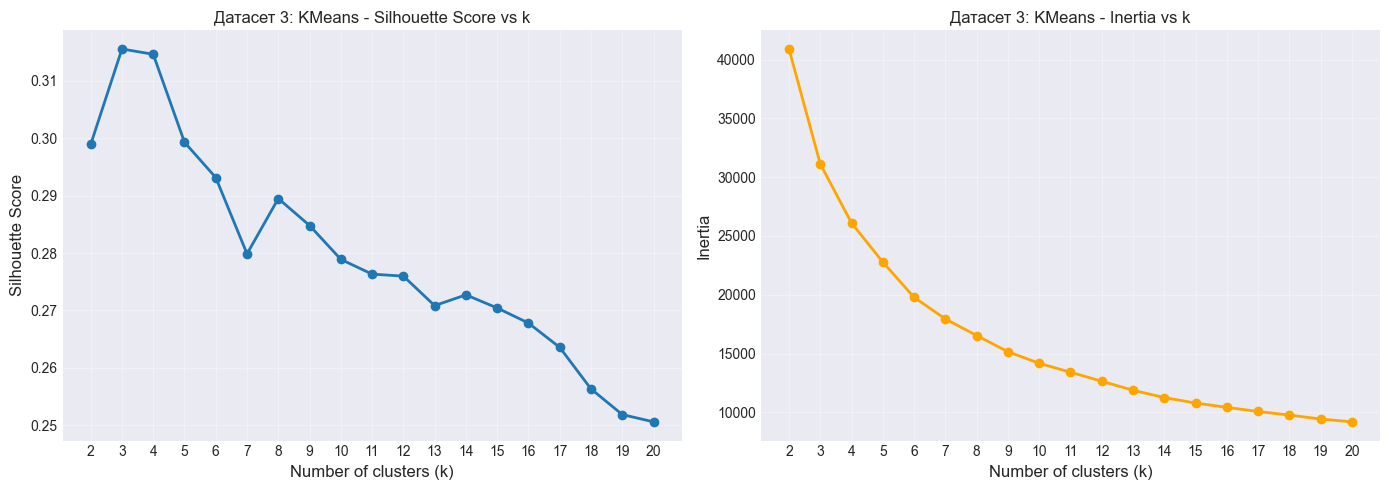


Оптимальное k по Silhouette Score: 3


In [ ]:
print("\n=== Датасет 3: KMEANS ===")
silhouette_scores_3 = []
inertia_3 = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans.fit_predict(X3_processed)
    silhouette_avg = silhouette_score(X3_processed, cluster_labels)
    silhouette_scores_3.append(silhouette_avg)
    inertia_3.append(kmeans.inertia_)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}, Inertia = {kmeans.inertia_:.4f}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_range, silhouette_scores_3, marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of clusters (k)', fontsize=12)
ax1.set_ylabel('Silhouette Score', fontsize=12)
ax1.set_title('Датасет 3: KMeans - Silhouette Score vs k', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

ax2.plot(k_range, inertia_3, marker='o', linestyle='-', linewidth=2, markersize=6, color='orange')
ax2.set_xlabel('Number of clusters (k)', fontsize=12)
ax2.set_ylabel('Inertia', fontsize=12)
ax2.set_title('Датасет 3: KMeans - Inertia vs k', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range)

plt.tight_layout()
plt.show()

optimal_k_3 = list(k_range)[np.argmax(silhouette_scores_3)]
print(f"\nОптимальное k по Silhouette Score: {optimal_k_3}")


In [67]:
print("\n=== Датасет 3: DBSCAN ===")
best_silhouette_3 = -1
best_params_3 = {}

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X3_processed)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)
        
        if n_clusters > 1 and n_clusters < len(X3_processed):
            try:
                silhouette_avg = silhouette_score(X3_processed, cluster_labels)
                print(f"eps={eps:.2f}, min_samples={min_samples}: Clusters={n_clusters}, Noise={n_noise}, Silhouette={silhouette_avg:.4f}")
                if silhouette_avg > best_silhouette_3:
                    best_silhouette_3 = silhouette_avg
                    best_params_3 = {'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters}
            except:
                pass

if best_params_3:
    print(f"\nОптимальные параметры DBSCAN: eps={best_params_3['eps']:.2f}, min_samples={best_params_3['min_samples']}, Silhouette={best_silhouette_3:.4f}")
else:
    print("Не удалось найти хорошие параметры для DBSCAN с положительным Silhouette Score")



=== Датасет 3: DBSCAN ===
eps=0.30, min_samples=3: Clusters=70, Noise=1302, Silhouette=-0.4599
eps=0.30, min_samples=5: Clusters=22, Noise=1880, Silhouette=-0.2866
eps=0.30, min_samples=10: Clusters=8, Noise=3235, Silhouette=-0.0725
eps=0.50, min_samples=3: Clusters=12, Noise=234, Silhouette=-0.2372
eps=0.50, min_samples=5: Clusters=4, Noise=333, Silhouette=-0.1129
eps=0.50, min_samples=10: Clusters=2, Noise=486, Silhouette=0.1266
eps=0.70, min_samples=3: Clusters=3, Noise=44, Silhouette=0.1882

Оптимальные параметры DBSCAN: eps=0.70, min_samples=3, Silhouette=0.1882


Метрики качества и визуализация для датасета 3

In [68]:
kmeans_3_best = KMeans(n_clusters=optimal_k_3, random_state=RANDOM_STATE, n_init=10)
labels_kmeans_3 = kmeans_3_best.fit_predict(X3_processed)

sil_kmeans_3 = silhouette_score(X3_processed, labels_kmeans_3)
db_kmeans_3 = davies_bouldin_score(X3_processed, labels_kmeans_3)
ch_kmeans_3 = calinski_harabasz_score(X3_processed, labels_kmeans_3)

if best_params_3:
    dbscan_3_best = DBSCAN(eps=best_params_3['eps'], min_samples=best_params_3['min_samples'])
    labels_dbscan_3 = dbscan_3_best.fit_predict(X3_processed)
    
    n_clusters_dbscan_3 = len(set(labels_dbscan_3)) - (1 if -1 in labels_dbscan_3 else 0)
    n_noise_dbscan_3 = list(labels_dbscan_3).count(-1)
    noise_fraction_3 = n_noise_dbscan_3 / len(labels_dbscan_3)
    
    non_noise_mask_3 = labels_dbscan_3 != -1
    if non_noise_mask_3.sum() > 1:
        X_non_noise_3 = X3_processed[non_noise_mask_3]
        labels_non_noise_3 = labels_dbscan_3[non_noise_mask_3]
        
        sil_dbscan_3 = silhouette_score(X_non_noise_3, labels_non_noise_3)
        db_dbscan_3 = davies_bouldin_score(X_non_noise_3, labels_non_noise_3)
        ch_dbscan_3 = calinski_harabasz_score(X_non_noise_3, labels_non_noise_3)
else:
    labels_dbscan_3 = None

if best_params_3 and sil_dbscan_3 > sil_kmeans_3:
    best_method_3 = "DBSCAN"
    best_labels_3 = labels_dbscan_3
    best_params_final_3 = best_params_3
else:
    best_method_3 = "KMeans"
    best_labels_3 = labels_kmeans_3
    best_params_final_3 = {'k': optimal_k_3}

pca_3 = PCA(n_components=2, random_state=RANDOM_STATE)
X3_pca = pca_3.fit_transform(X3_processed)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X3_pca[:, 0], X3_pca[:, 1], c=labels_kmeans_3, cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca_3.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca_3.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title(f'Датасет 3: KMeans (k={optimal_k_3})')
axes[0].grid(True, alpha=0.3)

if labels_dbscan_3 is not None:
    scatter = axes[1].scatter(X3_pca[:, 0], X3_pca[:, 1], c=labels_dbscan_3, cmap='plasma', alpha=0.6, s=50)
    axes[1].set_xlabel(f'PC1 ({pca_3.explained_variance_ratio_[0]*100:.1f}%)')
    axes[1].set_ylabel(f'PC2 ({pca_3.explained_variance_ratio_[1]*100:.1f}%)')
    axes[1].set_title(f'Датасет 3: DBSCAN (eps={best_params_3["eps"]:.2f}, ms={best_params_3["min_samples"]})')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1], label='Cluster (-1 = noise)')

plt.tight_layout()
plt.savefig(figures_dir / "07_pca_scatter_ds3.png", dpi=300, bbox_inches='tight')
plt.close()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, silhouette_scores_3, marker='o', linestyle='-', linewidth=2, markersize=8, label='Silhouette Score')
ax.axvline(optimal_k_3, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k_3}')
ax.set_xlabel('Number of clusters (k)', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Датасет 3: KMeans - Silhouette Score vs k', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xticks(k_range)
plt.tight_layout()
plt.savefig(figures_dir / "08_kmeans_silhouette_vs_k_ds3.png", dpi=300, bbox_inches='tight')
plt.close()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

methods = [best_method_3, "DBSCAN" if best_params_3 else "N/A"]
sil_scores = [sil_kmeans_3, sil_dbscan_3 if best_params_3 else 0]
db_scores = [db_kmeans_3, db_dbscan_3 if best_params_3 else 0]
ch_scores = [ch_kmeans_3, ch_dbscan_3 if best_params_3 else 0]

colors = ['steelblue', 'lightcoral']
x_pos = [0, 1]

axes[0].bar(x_pos[:len(methods)], sil_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Датасет 3: Silhouette Score\n(больше = лучше)', fontsize=11)
axes[0].set_xticks(x_pos[:len(methods)])
axes[0].set_xticklabels(methods)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x_pos[:len(methods)], db_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[1].set_ylabel('Score', fontsize=11)
axes[1].set_title('Датасет 3: Davies-Bouldin Score\n(меньше = лучше)', fontsize=11)
axes[1].set_xticks(x_pos[:len(methods)])
axes[1].set_xticklabels(methods)
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(x_pos[:len(methods)], ch_scores[:len(methods)], color=colors[:len(methods)], alpha=0.7)
axes[2].set_ylabel('Score', fontsize=11)
axes[2].set_title('Датасет 3: Calinski-Harabasz Score\n(больше = лучше)', fontsize=11)
axes[2].set_xticks(x_pos[:len(methods)])
axes[2].set_xticklabels(methods)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(figures_dir / "09_metrics_comparison_ds3.png", dpi=300, bbox_inches='tight')
plt.close()

### Проверка устойчивости KMeans на датасете 1 (разные random_state)

In [69]:
random_states = [42, 123, 456, 789, 999]
kmeans_results = []
silhouette_scores_robustness = []

for rs in random_states:
    kmeans_temp = KMeans(n_clusters=optimal_k_1, random_state=rs, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X1_processed)
    kmeans_results.append(labels_temp)
    sil_temp = silhouette_score(X1_processed, labels_temp)
    silhouette_scores_robustness.append(sil_temp)

ari_scores = []
for i in range(len(kmeans_results)):
    for j in range(i + 1, len(kmeans_results)):
        ari = adjusted_rand_score(kmeans_results[i], kmeans_results[j])
        ari_scores.append(ari)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, 6), silhouette_scores_robustness, color='steelblue', alpha=0.7)
axes[0].axhline(np.mean(silhouette_scores_robustness), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(silhouette_scores_robustness):.4f}')
axes[0].set_xlabel('Run Number', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Датасет 1: Silhouette Scores для разных random_state', fontsize=12)
axes[0].set_xticks(range(1, 6))
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].legend()

run_pairs = [f'Run {i+1} vs\nRun {j+1}' for i in range(len(kmeans_results)) for j in range(i + 1, len(kmeans_results))]
axes[1].bar(range(1, len(ari_scores) + 1), ari_scores, color='mediumseagreen', alpha=0.7)
axes[1].axhline(np.mean(ari_scores), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(ari_scores):.4f}')
axes[1].set_xlabel('Pair of Runs', fontsize=12)
axes[1].set_ylabel('Adjusted Rand Index (ARI)', fontsize=12)
axes[1].set_title('Датасет 1: ARI между парами запусков', fontsize=12)
axes[1].set_xticks(range(1, len(ari_scores) + 1))
axes[1].set_xticklabels(run_pairs, rotation=45, ha='right', fontsize=9)
axes[1].set_ylim([0, 1.05])
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].legend()

plt.tight_layout()
plt.savefig(figures_dir / "10_robustness_check_ds1.png", dpi=300, bbox_inches='tight')
plt.close()

## Сохранение финальных артефактов


In [70]:
import json
from pathlib import Path

if 'best_method_1' not in locals():
    best_method_1 = "KMeans" if sil_kmeans_1 >= (sil_dbscan_1 if 'sil_dbscan_1' in locals() else 0) else "DBSCAN"
    best_labels_1 = labels_kmeans_1 if best_method_1 == "KMeans" else labels_dbscan_1
    best_params_final_1 = {'k': optimal_k_1} if best_method_1 == "KMeans" else best_params_1

if 'best_method_2' not in locals():
    best_method_2 = "KMeans" if sil_kmeans_2 >= (sil_dbscan_2 if 'sil_dbscan_2' in locals() else 0) else "DBSCAN"
    best_labels_2 = labels_kmeans_2 if best_method_2 == "KMeans" else labels_dbscan_2
    best_params_final_2 = {'k': optimal_k_2} if best_method_2 == "KMeans" else best_params_2

if 'best_method_3' not in locals():
    best_method_3 = "KMeans" if sil_kmeans_3 >= (sil_dbscan_3 if 'sil_dbscan_3' in locals() else 0) else "DBSCAN"
    best_labels_3 = labels_kmeans_3 if best_method_3 == "KMeans" else labels_dbscan_3
    best_params_final_3 = {'k': optimal_k_3} if best_method_3 == "KMeans" else best_params_3

metrics_summary = {
    "dataset_1": {
        "KMeans": {
            "k": int(optimal_k_1),
            "silhouette_score": float(sil_kmeans_1),
            "davies_bouldin_score": float(db_kmeans_1),
            "calinski_harabasz_score": float(ch_kmeans_1)
        },
        "DBSCAN": {
            "eps": float(best_params_1['eps']) if best_params_1 else None,
            "min_samples": int(best_params_1['min_samples']) if best_params_1 else None,
            "n_clusters": int(n_clusters_dbscan_1) if best_params_1 else None,
            "noise_fraction": float(noise_fraction_1) if best_params_1 else None,
            "silhouette_score": float(sil_dbscan_1) if best_params_1 else None,
            "davies_bouldin_score": float(db_dbscan_1) if best_params_1 else None,
            "calinski_harabasz_score": float(ch_dbscan_1) if best_params_1 else None
        }
    },
    "dataset_2": {
        "KMeans": {
            "k": int(optimal_k_2),
            "silhouette_score": float(sil_kmeans_2),
            "davies_bouldin_score": float(db_kmeans_2),
            "calinski_harabasz_score": float(ch_kmeans_2)
        },
        "DBSCAN": {
            "eps": float(best_params_2['eps']) if best_params_2 else None,
            "min_samples": int(best_params_2['min_samples']) if best_params_2 else None,
            "n_clusters": int(n_clusters_dbscan_2) if best_params_2 else None,
            "noise_fraction": float(noise_fraction_2) if best_params_2 else None,
            "silhouette_score": float(sil_dbscan_2) if best_params_2 else None,
            "davies_bouldin_score": float(db_dbscan_2) if best_params_2 else None,
            "calinski_harabasz_score": float(ch_dbscan_2) if best_params_2 else None
        }
    },
    "dataset_3": {
        "KMeans": {
            "k": int(optimal_k_3),
            "silhouette_score": float(sil_kmeans_3),
            "davies_bouldin_score": float(db_kmeans_3),
            "calinski_harabasz_score": float(ch_kmeans_3)
        },
        "DBSCAN": {
            "eps": float(best_params_3['eps']) if best_params_3 else None,
            "min_samples": int(best_params_3['min_samples']) if best_params_3 else None,
            "n_clusters": int(n_clusters_dbscan_3) if best_params_3 else None,
            "noise_fraction": float(noise_fraction_3) if best_params_3 else None,
            "silhouette_score": float(sil_dbscan_3) if 'sil_dbscan_3' in locals() else None,
            "davies_bouldin_score": float(db_dbscan_3) if 'db_dbscan_3' in locals() else None,
            "calinski_harabasz_score": float(ch_dbscan_3) if 'ch_dbscan_3' in locals() else None
        }
    }
}

with open(artifacts_dir / "metrics_summary.json", "w") as f:
    json.dump(metrics_summary, f, indent=2)

best_configs = {
    "dataset_1": {
        "best_method": best_method_1,
        "parameters": best_params_final_1,
        "criterion": "silhouette_score",
        "reasoning": "Выбран метод с наивысшим значением silhouette score"
    },
    "dataset_2": {
        "best_method": best_method_2,
        "parameters": best_params_final_2,
        "criterion": "silhouette_score",
        "reasoning": "Выбран метод с наивысшим значением silhouette score"
    },
    "dataset_3": {
        "best_method": best_method_3,
        "parameters": best_params_final_3,
        "criterion": "silhouette_score",
        "reasoning": "Выбран метод с наивысшим значением silhouette score"
    }
}

with open(artifacts_dir / "best_configs.json", "w") as f:
    json.dump(best_configs, f, indent=2)

labels_df_1 = pd.DataFrame({
    'sample_id': sample_id_data1,
    'cluster_label': best_labels_1
})
labels_df_1.to_csv(labels_dir / "labels_hw07_ds1.csv", index=False)

labels_df_2 = pd.DataFrame({
    'sample_id': sample_id_data2,
    'cluster_label': best_labels_2
})
labels_df_2.to_csv(labels_dir / "labels_hw07_ds2.csv", index=False)

labels_df_3 = pd.DataFrame({
    'sample_id': sample_id_data3,
    'cluster_label': best_labels_3
})
labels_df_3.to_csv(labels_dir / "labels_hw07_ds3.csv", index=False)